## <strong> 13. 시계열 전용 연산

필요한 라이브러리: ```yfinance```, ```pandas_datareader```

In [2]:
#!pip install --upgrade yfinance 

In [3]:
import yfinance as yf
import pandas as pd
from matplotlib import pyplot as plt

In [4]:
# 구글 주식 데이터 로딩
goog = yf.download("GOOGL", start="2004-01-01", end="2024-12-31")
goog.head()

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,GOOGL,GOOGL,GOOGL,GOOGL,GOOGL
Date,,,,,
2004-08-19,2.499063,2.591713,2.389974,2.490595,893181924
2004-08-20,2.697563,2.716741,2.503048,2.515750,456686856
2004-08-23,2.724711,2.826327,2.715994,2.758335,365122512
2004-08-24,2.611887,2.779504,2.579510,2.770538,304946748
2004-08-25,2.640031,2.689843,2.587231,2.614129,183772044


In [5]:
# [+] 종가(Close) 데이터만 사용하기
goog = goog['Close']
goog

Ticker,GOOGL
Date,
2004-08-19,2.499063
2004-08-20,2.697563
2004-08-23,2.724711
2004-08-24,2.611887
2004-08-25,2.640031
...,...
2024-12-23,194.406113
2024-12-24,195.884399
2024-12-26,195.375000


<Axes: xlabel='Date'>

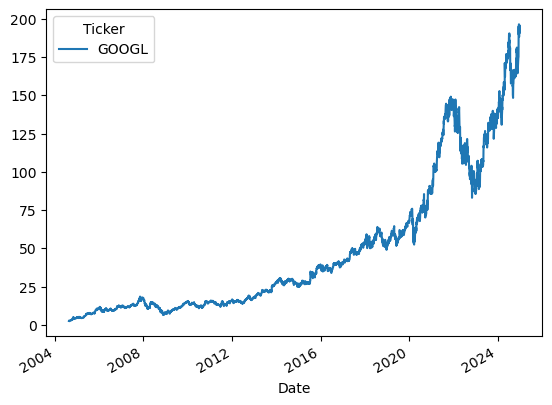

In [6]:
# [+] Lineplot 시각화
goog.plot()

#### <strong> 리샘플링(Resampling)
+ ```resample()```: 빈도를 기준으로 집계 연산
+ ```asfreq()```: 빈도 단위 별 데이터 선택

In [7]:
# [+] 다운샘플링: resample()
goog_downsampled = goog.resample('ME').mean()
goog_downsampled

Ticker,GOOGL
Date,
2004-08-31,2.621656
2004-09-30,2.820030
2004-10-31,3.816363
2004-11-30,4.420688
2004-12-31,4.527155
...,...
2024-08-31,162.983515
2024-09-30,157.782533
2024-10-31,165.020171


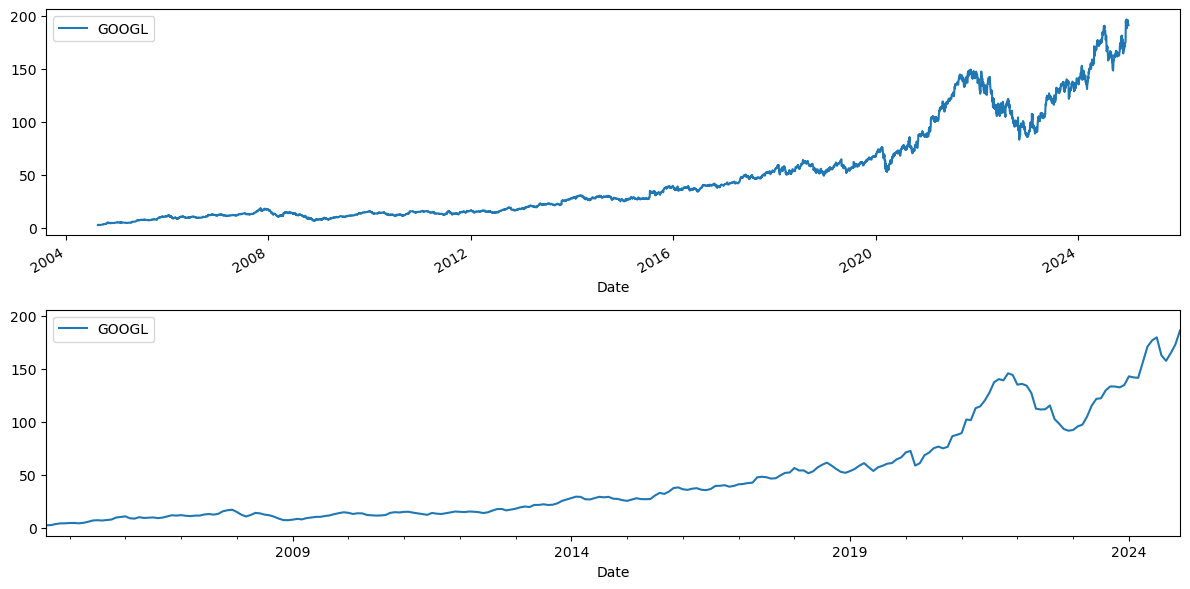

In [8]:
fig, ax = plt.subplots(2, 1, sharey=True, figsize=(12, 6))
goog.plot(label='original', ax=ax[0])
ax[0].legend()
goog_downsampled.plot(label='downsampled', ax=ax[1])
ax[1].legend()
plt.tight_layout()

Ticker           GOOGL
Date                  
2004-08-31    2.549623
2004-09-30    3.227811
2004-10-31         NaN
2004-11-30    4.532385
2004-12-31    4.801619
...                ...
2024-07-31  170.919708
2024-08-31         NaN
2024-09-30  165.469574
2024-10-31  170.717514
2024-11-30         NaN

[244 rows x 1 columns]


<Axes: xlabel='Date'>

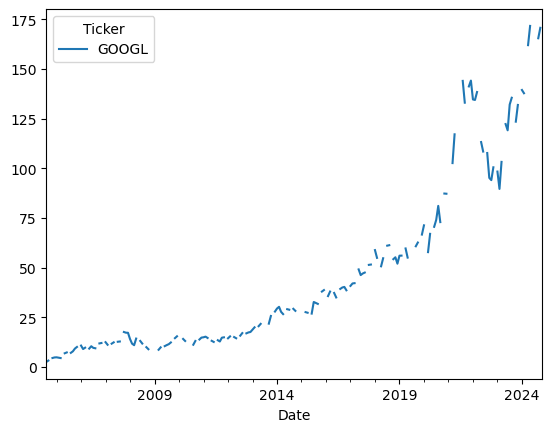

In [9]:
# [+] 다운샘플링: asfreq()
goog_downsampled = goog.asfreq('ME')
print(goog_downsampled)

goog_downsampled.plot()

In [16]:
# [+] 업샘플링: resample()
goog_upsampled = goog.resample('12h').mean()
print(goog_upsampled)

Ticker                    GOOGL
Date                           
2004-08-19 00:00:00    2.499063
2004-08-19 12:00:00         NaN
2004-08-20 00:00:00    2.697563
2004-08-20 12:00:00         NaN
2004-08-21 00:00:00         NaN
...                         ...
2024-12-28 00:00:00         NaN
2024-12-28 12:00:00         NaN
2024-12-29 00:00:00         NaN
2024-12-29 12:00:00         NaN
2024-12-30 00:00:00  191.020004

[14877 rows x 1 columns]


#### <strong> 시프팅(Shifting)
+ ```shift(periods)``` : ```periods``` 값 만큼 시계열 이동

In [17]:
# [+] 900일 뒤로 시프팅 적용
goog_shifted = goog.shift(periods=900)
goog_shifted

Ticker,GOOGL
Date,
2004-08-19,NaN
2004-08-20,NaN
2004-08-23,NaN
2004-08-24,NaN
2004-08-25,NaN
...,...
2024-12-23,118.449211
2024-12-24,117.571899
2024-12-26,117.281784


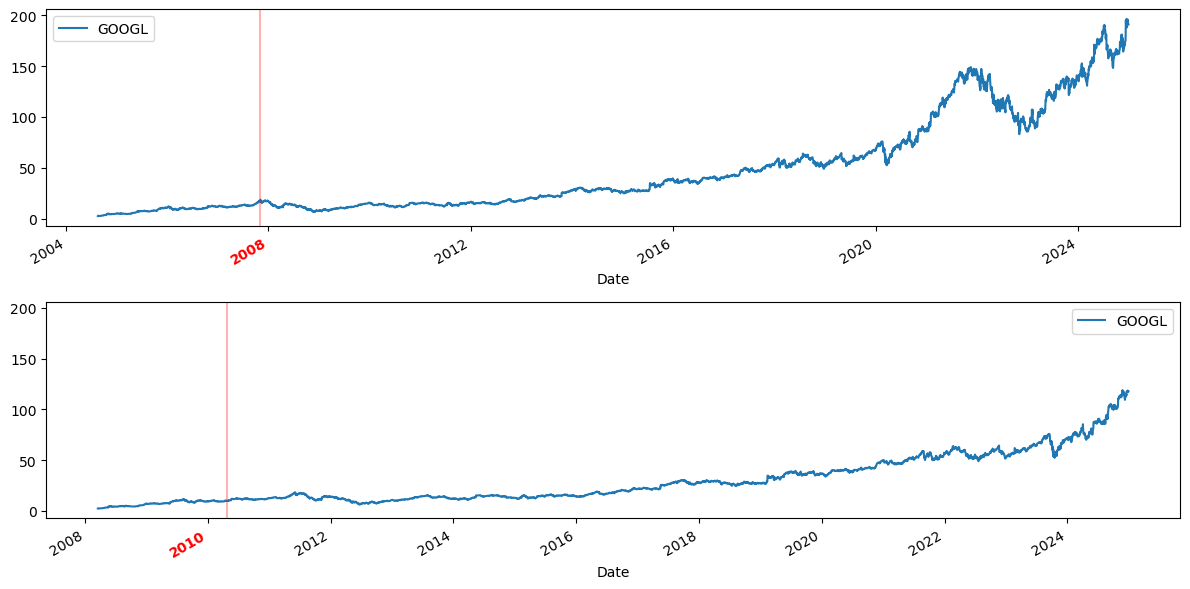

In [18]:
fig, ax = plt.subplots(2, 1, sharey=True, figsize=(12, 6))

# Legends and annotations
local_max = pd.to_datetime('2007-11-05')
offset = pd.Timedelta(900, 'D')

goog.plot(label='original', ax=ax[0])
ax[0].legend()
ax[0].get_xticklabels()[2].set(weight='heavy', color='red')
ax[0].axvline(local_max, alpha=0.3, color='red')

goog_shifted.plot(label='shifted 900 days', ax=ax[1])
ax[1].legend()
ax[1].get_xticklabels()[2].set(weight='heavy', color='red')
ax[1].axvline(local_max + offset, alpha=0.3, color='red')

plt.tight_layout()

In [19]:
# shifting 응용: 주가 변화율 계산
goog_shifted = goog.shift(periods=1) # [+] 시프팅
(goog - goog_shifted) / goog_shifted # [+] 주가 변화율 계산

Ticker,GOOGL
Date,
2004-08-19,NaN
2004-08-20,0.079430
2004-08-23,0.010064
2004-08-24,-0.041408
2004-08-25,0.010775
...,...
2024-12-23,0.016823
2024-12-24,0.007604
2024-12-26,-0.002601


Ticker         GOOGL
Date                
2004-08-19       NaN
2004-08-20  0.198500
2004-08-23  0.027148
2004-08-24 -0.112824
2004-08-25  0.028144
...              ...
2024-12-23  3.216309
2024-12-24  1.478287
2024-12-26 -0.509399
2024-12-27 -2.836746
2024-12-30 -1.518250

[5126 rows x 1 columns]


<Axes: xlabel='Date'>

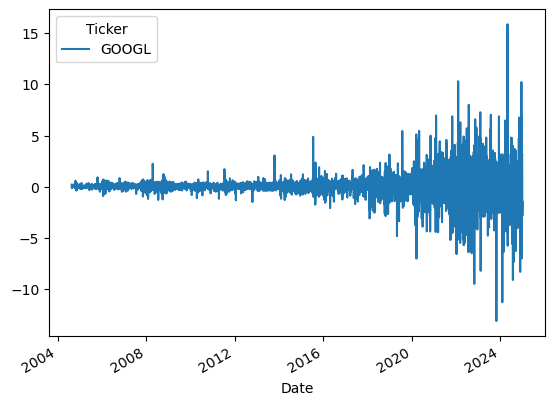

In [20]:
# shifting 응용: 차분 시계열 구하기
goog_diff = goog - goog_shifted  # [+] 차분
print(goog_diff)

goog_diff.plot()

#### <strong> 윈도잉(Windowing)

Rolling [window=365,center=False,axis=0,method=single]


<Axes: xlabel='Date'>

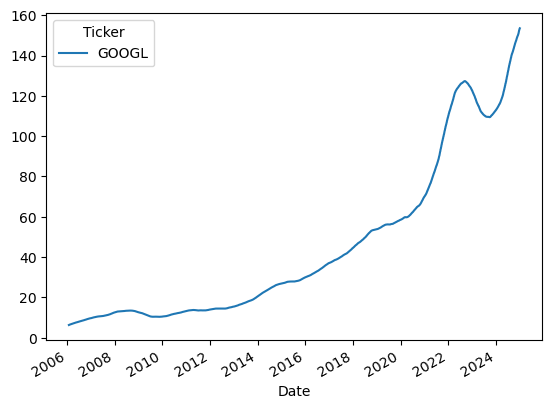

In [21]:
# [+] 365일 단위 윈도잉
goog_rolled = goog.rolling(365)
print(goog_rolled)

goog_rolled.mean().plot()

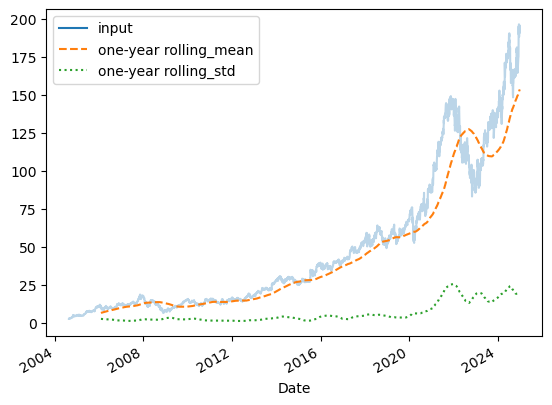

In [22]:
data = pd.DataFrame({'input': goog.values.flatten(),
                     # moving average
                     'one-year rolling_mean': goog_rolled.mean().values.flatten(), 
                     # standard deviation
                     'one-year rolling_std': goog_rolled.std().values.flatten()}, index=goog.index)
ax = data.plot(style=['-', '--', ':'])
ax.lines[0].set_alpha(0.3)